# Universities and Colleges 

#### For this notebook, I will be looking at the locations of universities/colleges and looking at buffer zones around the school to later examine what are the most common stores located near universities.

Author: Nour Abou-Fadel

First I will import the libraries

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import contextily as ctx

In [4]:
import matplotlib.pyplot as plt

In [5]:
import plotly.express as px

Next, I'll add my data indicating the name and location of colleges LA County

In [6]:
gdf = gpd.read_file('Colleges_and_Universities.zip')

I want to take a look at what my data looks like: 

In [7]:
gdf.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,date_updat,email,dis_status,POINT_X,POINT_Y,geometry
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,3801 W. Temple Ave.,None,...,http://egis3.lacounty.gov/lms/?p=3072,publish,34.049531,-117.814466,2013-06-01,None,None,6.617873e+06,1.840458e+06,POINT (-117.81447 34.04953)
1,2895,211,None,Education,Colleges and Universities,None,www.calstate.edu/executive/,"California State University, The - Office Of T...",401 Golden Shore,None,...,http://egis3.lacounty.gov/lms/?p=3084,publish,33.764616,-118.201257,2013-06-01,None,None,6.500498e+06,1.736780e+06,POINT (-118.20126 33.76462)
2,2973,211,None,Education,Colleges and Universities,None,www.calstatela.edu,California State University Los Angeles,5151 State University Dr.,None,...,http://egis3.lacounty.gov/lms/?p=3145,publish,34.062769,-118.170923,2013-06-01,None,None,6.509902e+06,1.845267e+06,POINT (-118.17092 34.06277)
3,3097,211,None,Education,Colleges and Universities,None,www.laccd.edu,Los Angeles Community College District,770 Wilshire Blvd.,None,...,http://egis3.lacounty.gov/lms/?p=3246,publish,34.049138,-118.258111,2013-06-01,None,None,6.483483e+06,1.840363e+06,POINT (-118.25811 34.04914)
4,11961,HSIP Freedom CollegesUniversities,203049,Education,Colleges and Universities,None,LA County,Hebrew Union College-Jewish Institute Of Religion,3077 University Ave,None,...,http://egis3.lacounty.gov/lms/?p=12778,publish,34.025458,-118.282567,2010-11-01,None,None,6.476050e+06,1.831765e+06,POINT (-118.28257 34.02546)


Now that I know that my rows and columns consist of, I'm going to narrow down the data. I'm mostly focus on the ID, name, location, and geometry

In [8]:
columns_to_keep= ['OBJECTID',
 'source',
 'ext_id',
 'cat1',
 'cat2',
 'cat3',
 'org_name',
 'Name',
 'city',
 'state',
 'info1',
 'info2',
 'post_id',
 'zip',
 'latitude',
 'longitude',
 'dis_status',
 'geometry']

In [9]:
gdf= gdf[columns_to_keep]

For mapping purposes, I only need to the ID, name and geometry (latitude and longitude)

In [10]:
desired_columns=['OBJECTID','Name','city','zip','latitude','longitude','geometry']

gdf[desired_columns]

,OBJECTID,Name,city,zip,latitude,longitude,geometry
0,2878,California State Polytechnic University - Pomona,Pomona,91768,34.049531,-117.814466,POINT (-117.81447 34.04953)
1,2895,"California State University, The - Office Of T...",Long Beach,90802,33.764616,-118.201257,POINT (-118.20126 33.76462)
2,2973,California State University Los Angeles,Los Angeles,90032,34.062769,-118.170923,POINT (-118.17092 34.06277)
3,3097,Los Angeles Community College District,Los Angeles,90017,34.049138,-118.258111,POINT (-118.25811 34.04914)
4,11961,Hebrew Union College-Jewish Institute Of Religion,Los Angeles,90007,34.025458,-118.282567,POINT (-118.28257 34.02546)
...,...,...,...,...,...,...,...
212,62177,Los Angeles Trade Technical College,Los Angeles,90015,34.033227,-118.270041,POINT (-118.27004 34.03323)
213,62310,"Help Group, The",Sherman Oaks,91401,34.171910,-118.419360,POINT (-118.41936 34.17191)
214,62928,West Los Angeles College,Culver City,90230,34.003062,-118.386221,POINT (-118.38622 34.00306)
215,63227,Long Beach Community College District,Long Beach,90808,33.834305,-118.135638,POINT (-118.13564 33.83430)


Saving this narrowed down list as gdf_trimmed to refer back to

In [11]:
gdf_trimmed=gdf[desired_columns].copy()
gdf_trimmed

,OBJECTID,Name,city,zip,latitude,longitude,geometry
0,2878,California State Polytechnic University - Pomona,Pomona,91768,34.049531,-117.814466,POINT (-117.81447 34.04953)
1,2895,"California State University, The - Office Of T...",Long Beach,90802,33.764616,-118.201257,POINT (-118.20126 33.76462)
2,2973,California State University Los Angeles,Los Angeles,90032,34.062769,-118.170923,POINT (-118.17092 34.06277)
3,3097,Los Angeles Community College District,Los Angeles,90017,34.049138,-118.258111,POINT (-118.25811 34.04914)
4,11961,Hebrew Union College-Jewish Institute Of Religion,Los Angeles,90007,34.025458,-118.282567,POINT (-118.28257 34.02546)
...,...,...,...,...,...,...,...
212,62177,Los Angeles Trade Technical College,Los Angeles,90015,34.033227,-118.270041,POINT (-118.27004 34.03323)
213,62310,"Help Group, The",Sherman Oaks,91401,34.171910,-118.419360,POINT (-118.41936 34.17191)
214,62928,West Los Angeles College,Culver City,90230,34.003062,-118.386221,POINT (-118.38622 34.00306)
215,63227,Long Beach Community College District,Long Beach,90808,33.834305,-118.135638,POINT (-118.13564 33.83430)


Next, I want to see plot the Universities and Colleges through the geometry column and match it. So first, I want to take a look at my geometry column.

In [12]:
gdf_trimmed.geometry

0      POINT (-117.81447 34.04953)
1      POINT (-118.20126 33.76462)
2      POINT (-118.17092 34.06277)
3      POINT (-118.25811 34.04914)
4      POINT (-118.28257 34.02546)
                  ...             
212    POINT (-118.27004 34.03323)
213    POINT (-118.41936 34.17191)
214    POINT (-118.38622 34.00306)
215    POINT (-118.13564 33.83430)
216    POINT (-118.38622 34.00306)
Name: geometry, Length: 217, dtype: geometry

Now that I've seen my geometry column listing the latitude and longitude of a point to represent the university locations. I want to match the university name to the latitude and longitude listed. This way, I can easily find the name of the university when looking at my map.

In order to do this for all the schools, I'm going to create a loop. This loop will show the name and geometry for each of my universities. I will use the loop for all my data points (universities) in gdf_trimmed

In [13]:
for index, row in gdf_trimmed.iterrows():
    print(row.Name,row.latitude,row.longitude)

California State Polytechnic University - Pomona 34.049531 -117.814466
California State University, The - Office Of The Chancellor 33.764616 -118.201257
California State University Los Angeles 34.062769 -118.170923
Los Angeles Community College District 34.049138 -118.258111
Hebrew Union College-Jewish Institute Of Religion 34.025458 -118.282567
Itt Technical Institute-Sylmar 34.30001 -118.473909
Antioch University-Los Angeles Branch 33.98764 -118.384651
Platt College-Los Angeles 34.081813 -118.151838
Los Angeles Ort Technical Institute 34.063876 -118.369383
Everest College-West Los Angeles 34.032826 -118.389963
Thuy Princess Beauty College 34.057865 -117.748468
North-West College-Glendale 34.148546 -118.255112
Everest College-City Of Industry 34.02892 -118.02357
Fremont College 33.868223 -118.098966
Universal College Of Beauty Inc 34.004239 -118.331741
Itt Technical Institute-Torrance 33.849085 -118.290463
Los Angeles Ort Technical Institute-Sherman Oaks 34.15321 -118.462578
Hacienda 

Next, I need to match make sure that my data points have the correct projection.

In [14]:
gdf_trimmed = gdf.to_crs(epsg=3857)

Now I'm going to plot the locations of the schools in LA County

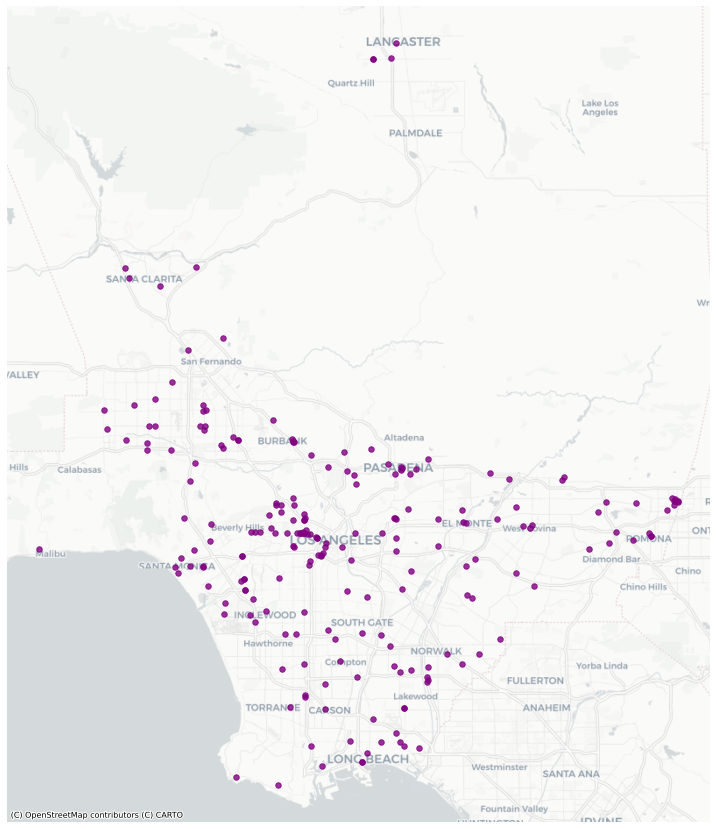

In [15]:
fig,ax = plt.subplots(figsize=(15,15))

gdf_trimmed.plot(ax=ax,
             color='purple',
             markersize=30, alpha=.8,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Through the loop, I can now see the locations of all the schools in LA County and if I click on one data point, I will get the name of the university.

Now that I have the location and names of the universities in LA County, I want to see what are the most common stores located around them. In order to do this, I will be using the buffer function. Once I've created a buffer around the schools - I will add the locations of different stores and narrow down the most common stores located in the buffer zone through spatial join.

In [16]:
gdf_trimmed_buffer = gdf_trimmed.copy()

In order to create a clear correlation between the universities and store locations, I need to pick a short distance. I'm going to start with 2 miles around the schools and see what I find. 2 miles is around 3000 meters. 

In [17]:
gdf_trimmed_buffer['geometry']=gdf_trimmed_buffer['geometry'].buffer(3000)

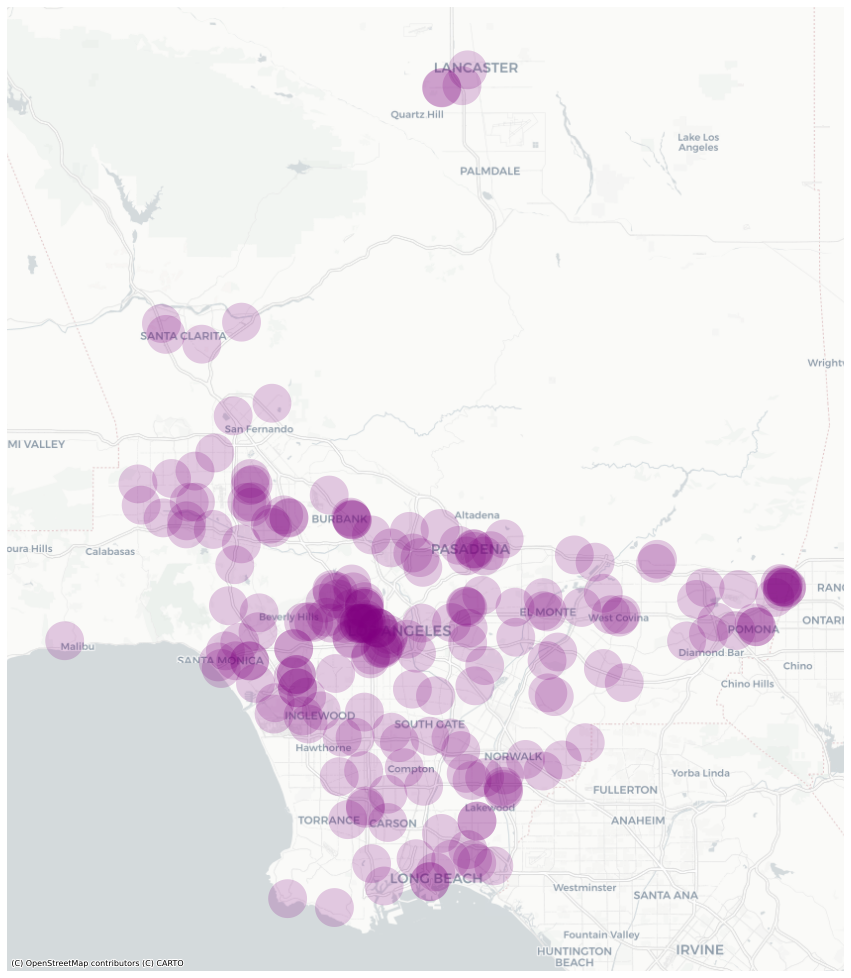

In [18]:
fig,ax = plt.subplots(figsize=(15,20))

gdf_trimmed_buffer.plot(ax=ax,
             color='purple',
             markersize=.5, alpha=.2,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

I've mapped a 3000 meter buffer zone arounf each university. I realized that this would need more refinement since the points that indicate the university location is just a center point and so the buffer is starting from there rather than starting from the outer boundary of each school. I still need to figure out how to map the out boundary of each university in order to accurately show the buffer zone outside of the school instead of outside the center point.

In [19]:
grs= gpd.read_file('GroceryStores.geojson')

Now that I have my university buffer zones mapped, I want to take a look at the stores that fall within this buffer zone. So, I've imported the grocery stores data from our other notebook.

In [20]:
list(grs)

['Store_Name',
 'Store_Chain',
 'Street_Number',
 'Street_Name',
 'Additional Address',
 'City',
 'Zip_Code',
 'Latitude',
 'Longitude',
 'geometry']

I now need to filter the data to show the store name, location, chain, and geometry.

In [21]:
desired_columns=['Store_Name','Store_Chain','Latitude','Longitude','geometry']

grs[desired_columns]

,Store_Name,Store_Chain,Latitude,Longitude,geometry
0,99 Ranch Market 38,99 Ranch Market,34.09719,-118.1227,POINT (-13149358.815 4041859.746)
1,99 RANCH MARKET 17,99 Ranch Market,33.87005,-118.0824,POINT (-13144872.640 4011366.235)
2,99 Ranch Market 18,99 Ranch Market,33.99284,-117.9318,POINT (-13128107.924 4027840.654)
3,99 RANCH MARKET 7,99 Ranch Market,34.12338,-118.0597,POINT (-13142345.687 4045381.002)
4,99 Ranch Market 3,99 Ranch Market,33.99646,-117.8884,POINT (-13123276.658 4028326.701)
...,...,...,...,...,...
1372,Whole Foods Market 10177,Whole_Foods,34.07133,-118.3603,POINT (-13175808.326 4038383.929)
1373,Whole Foods Market 10536,Whole_Foods,33.97406,-118.4257,POINT (-13183088.621 4025319.450)
1374,Whole Foods Market 10545,Whole_Foods,34.15423,-118.3369,POINT (-13173203.450 4049530.195)
1375,Whole Foods Market 10383,Whole_Foods,34.01985,-118.4973,POINT (-13191059.096 4031467.708)


In [22]:
grs_trimmed=grs[desired_columns]

In [23]:
gdf_trimmed_buffer['geometry']=gdf_trimmed_buffer['geometry'].buffer(3000)

Creating a spatial join between the universities buffer zone and the grocery store location. I want to get data from the grocery store layer and attach it to the unversity buffer layer. 

In [24]:
join = gpd.sjoin( grs_trimmed, gdf_trimmed_buffer, how='left')
join.head()

,Store_Name,Store_Chain,Latitude,Longitude,geometry,index_right,OBJECTID,source,ext_id,cat1,...,Name,city,state,info1,info2,post_id,zip,latitude,longitude,dis_status
0,99 Ranch Market 38,99 Ranch Market,34.09719,-118.1227,POINT (-13149358.815 4041859.746),109.0,12066.0,HSIP Freedom CollegesUniversities,119465,Education,...,Everest College-Alhambra,Alhambra,CA,None,776,12883.0,91803,34.079933,-118.148322,None
0,99 Ranch Market 38,99 Ranch Market,34.09719,-118.1227,POINT (-13149358.815 4041859.746),119.0,12076.0,HSIP Freedom CollegesUniversities,121992,Education,...,Rosemead Beauty School,Rosemead,CA,None,170,12893.0,91770,34.080498,-118.082922,None
0,99 Ranch Market 38,99 Ranch Market,34.09719,-118.1227,POINT (-13149358.815 4041859.746),145.0,12106.0,HSIP Freedom CollegesUniversities,123581,Education,...,Pinnacle College,Alhambra,CA,None,64,12919.0,91803,34.081485,-118.150493,None
0,99 Ranch Market 38,99 Ranch Market,34.09719,-118.1227,POINT (-13149358.815 4041859.746),7.0,11964.0,HSIP Freedom CollegesUniversities,260789,Education,...,Platt College-Los Angeles,Alhambra,CA,None,160,12781.0,91803,34.081813,-118.151838,None
0,99 Ranch Market 38,99 Ranch Market,34.09719,-118.1227,POINT (-13149358.815 4041859.746),18.0,11975.0,HSIP Freedom CollegesUniversities,393524,Education,...,Alhambra Beauty College,Alhambra,CA,None,101,12792.0,91801,34.093972,-118.128976,None


In [25]:
print(grs_trimmed.columns)

Index(['Store_Name', 'Store_Chain', 'Latitude', 'Longitude', 'geometry'], dtype='object')


In [26]:
print(gdf_trimmed_buffer.columns)

Index(['OBJECTID', 'source', 'ext_id', 'cat1', 'cat2', 'cat3', 'org_name',
       'Name', 'city', 'state', 'info1', 'info2', 'post_id', 'zip', 'latitude',
       'longitude', 'dis_status', 'geometry'],
      dtype='object')


In [27]:
join2 = gpd.sjoin(gdf_trimmed_buffer,grs_trimmed, how='left')
join2.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,city,state,...,zip,latitude,longitude,dis_status,geometry,index_right,Store_Name,Store_Chain,Latitude,Longitude
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,91768,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",155,BIG K-MART 3169,Big_k_mart,34.02113,-117.8103
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,91768,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",908,Sprouts Farmes Market 420,Sprouts,34.02119,-117.8104
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,91768,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",1247,VONS 2062,Vons,34.0212,-117.8101
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,91768,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",398,Haggen Fresh Foods 2160,Haggen,34.0212,-117.8101
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,91768,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",860,Smart & Final 942,Smart&final,34.02122,-117.8101


In [28]:
join2['count']=1

In [29]:
join2.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,city,state,...,latitude,longitude,dis_status,geometry,index_right,Store_Name,Store_Chain,Latitude,Longitude,count
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",155,BIG K-MART 3169,Big_k_mart,34.02113,-117.8103,1
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",908,Sprouts Farmes Market 420,Sprouts,34.02119,-117.8104,1
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",1247,VONS 2062,Vons,34.0212,-117.8101,1
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",398,Haggen Fresh Foods 2160,Haggen,34.0212,-117.8101,1
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,...,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049...",860,Smart & Final 942,Smart&final,34.02122,-117.8101,1


In [30]:
join3= join2.groupby(["Name","Store_Chain"],as_index=False).sum()
join3.head(20)

,Name,Store_Chain,OBJECTID,post_id,latitude,longitude,index_right,count
0,Abram Friedman Occupational Center,Food_4_Less,60165,64250,170.171125,-591.330815,1357,5
1,Abram Friedman Occupational Center,Fresh&Easy,24066,25700,68.068450,-236.532326,618,2
2,Abram Friedman Occupational Center,Galleria,12033,12850,34.034225,-118.266163,339,1
3,Abram Friedman Occupational Center,H_mart,24066,25700,68.068450,-236.532326,769,2
4,Abram Friedman Occupational Center,Hows,12033,12850,34.034225,-118.266163,416,1
5,Abram Friedman Occupational Center,Island_Pacific,12033,12850,34.034225,-118.266163,423,1
6,Abram Friedman Occupational Center,Jons,48132,51400,136.136900,-473.064652,1743,4
7,Abram Friedman Occupational Center,Mother_Nutrition,96264,102800,272.273800,-946.129304,4013,8
8,Abram Friedman Occupational Center,Northgate,12033,12850,34.034225,-118.266163,539,1
9,Abram Friedman Occupational Center,Numero_uno,84231,89950,238.239575,-827.863141,3917,7


I now want to create a dataframe that counts theg grocery store chains in the buffer zones

In [31]:
stores_by_gdf = join3.Store_Chain.value_counts().rename_axis('Store_Chain').reset_index(name='store_count')
stores_by_gdf.head()

,Store_Chain,store_count
0,Smart&final,193
1,Target,189
2,Ralphs,187
3,Vons,186
4,Albertsons,160


In [32]:
stores_by_gdf.info

<bound method DataFrame.info of               Store_Chain  store_count
0             Smart&final          193
1                  Target          189
2                  Ralphs          187
3                    Vons          186
4              Albertsons          160
5        Mother_Nutrition          157
6             Sav_on_drug          149
7             Food_4_Less          148
8             Trader_joes          142
9              Fresh&Easy          139
10                Walmart          117
11       Superior_grocers          111
12            Whole_Foods          103
13                Sprouts           99
14              Northgate           87
15             Numero_uno           84
16                   Aldi           83
17       Costco_Wholesale           80
18                   Jons           76
19               El_Super           74
20                  Kmart           70
21           Seafood_city           62
22         Island_Pacific           61
23                Gelsons       

In [33]:
gdf_trimmed_buffer

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,city,state,info1,info2,post_id,zip,latitude,longitude,dis_status,geometry
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,Pomona,CA,None,None,3072,91768,34.049531,-117.814466,None,"POLYGON ((-13109049.983 4035601.968, -13109049..."
1,2895,211,None,Education,Colleges and Universities,None,www.calstate.edu/executive/,"California State University, The - Office Of T...",Long Beach,CA,None,None,3084,90802,33.764616,-118.201257,None,"POLYGON ((-13152107.360 3997386.526, -13152107..."
2,2973,211,None,Education,Colleges and Universities,None,www.calstatela.edu,California State University Los Angeles,Los Angeles,CA,None,None,3145,90032,34.062769,-118.170923,None,"POLYGON ((-13148730.595 4037380.685, -13148730..."
3,3097,211,None,Education,Colleges and Universities,None,www.laccd.edu,Los Angeles Community College District,Los Angeles,CA,None,None,3246,90017,34.049138,-118.258111,None,"POLYGON ((-13158436.319 4035549.167, -13158436..."
4,11961,HSIP Freedom CollegesUniversities,203049,Education,Colleges and Universities,None,LA County,Hebrew Union College-Jewish Institute Of Religion,Los Angeles,CA,None,99,12778,90007,34.025458,-118.282567,None,"POLYGON ((-13161158.748 4032368.125, -13161158..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,62177,211,None,Education,Colleges and Universities,None,None,Los Angeles Trade Technical College,Los Angeles,CA,None,None,68997,90015,34.033227,-118.270041,None,"POLYGON ((-13159764.382 4033411.726, -13159764..."
213,62310,211,None,Education,Colleges and Universities,None,None,"Help Group, The",Sherman Oaks,CA,None,None,70042,91401,34.171910,-118.419360,None,"POLYGON ((-13176386.475 4052055.959, -13176386..."
214,62928,211,None,Education,Colleges and Universities,None,None,West Los Angeles College,Culver City,CA,None,None,70461,90230,34.003062,-118.386221,None,"POLYGON ((-13172697.492 4029360.430, -13172697..."
215,63227,211,None,Education,Colleges and Universities,None,None,Long Beach Community College District,Long Beach,CA,None,None,70577,90808,33.834305,-118.135638,None,"POLYGON ((-13144802.720 4006722.013, -13144802..."


Now I want to see the stores that most commonly fall in this buffer zone:

<AxesSubplot:xlabel='Store_Chain'>

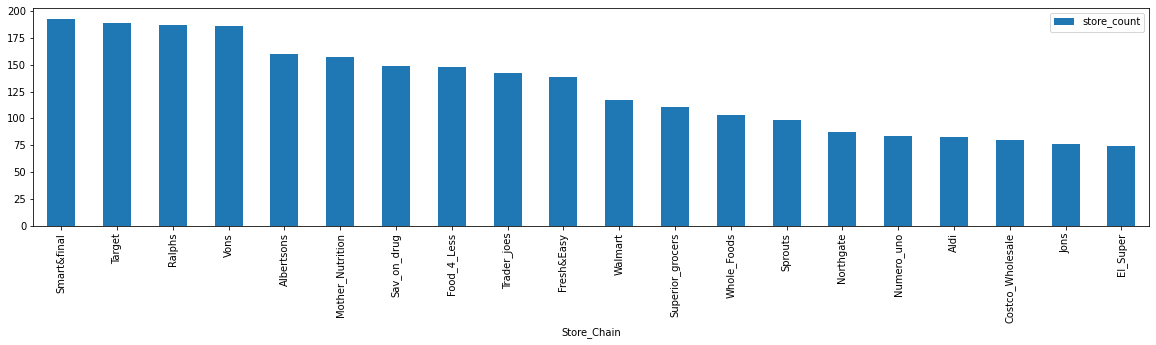

In [34]:
stores_by_gdf[:20].plot.bar(figsize=(20,4),
                             x='Store_Chain',
                             y='store_count')

In [35]:
gdf_trimmed_buffer=join3.merge(stores_by_gdf,on='Store_Chain')

gdf_trimmed_buffer.head()

,Name,Store_Chain,OBJECTID,post_id,latitude,longitude,index_right,count,store_count
0,Abram Friedman Occupational Center,Food_4_Less,60165,64250,170.171125,-591.330815,1357,5,148
1,Academy Of Barbering Arts,Food_4_Less,24050,25684,68.456496,-237.118744,547,2,148
2,Adelante Career Institute,Food_4_Less,48436,51688,136.880334,-473.801308,1062,4,148
3,Advanced College,Food_4_Less,24016,25650,67.831104,-236.316444,493,2,148
4,Alhambra Beauty College,Food_4_Less,11975,12792,34.093972,-118.128976,251,1,148


<AxesSubplot:>

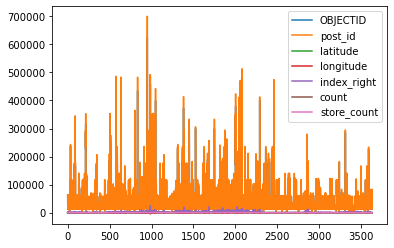

In [36]:
gdf_trimmed_buffer.plot()

In [37]:
gdf_buffer2= gdf_trimmed_buffer.to_crs(espg=3857)

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [ ]:
fig,ax = plt.subplots(figsize=(15,20))

join3.plot(ax=ax,
             color='purple',
             markersize=.5, alpha=.2,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)